##### By Mola Ayenew and Amer Marzouk

# Introduction: Loading images from a directory

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding, Flatten
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, MaxPooling2D
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [2]:
data_gen = ImageDataGenerator(rescale=1.0/255)

## Introduction: Loading images from a directory

In [3]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


We'll take a look at a few images. We first read one batch from the generator. This will return a part of the training data: some images, and the corresponding labels (0 for other, 1 for car).

In [4]:
Xbatch, Ybatch = train_generator.next()

In [5]:
Xbatch.shape

(32, 64, 64, 3)

In [6]:
Ybatch[4]

1.0

In [7]:
from matplotlib import pyplot as plt
plt.style.use('bmh')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

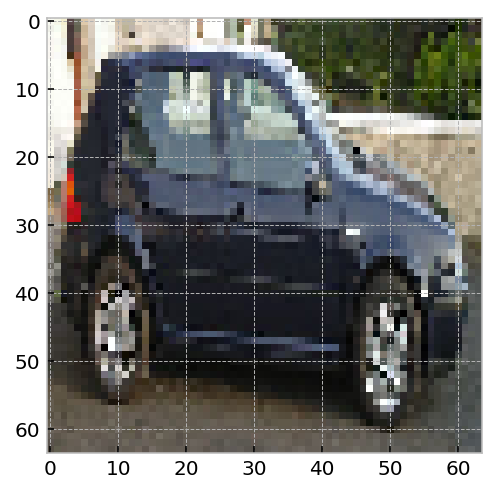

In [8]:
plt.imshow(Xbatch[4]);

## Part 1: Training a convolutional neural network

In [9]:
Xbatch = Xbatch.reshape(Xbatch.shape[0], img_size, img_size, 3)
def make_convnet(img_width, img_height, c):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                     activation='relu',
                     input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
cnn = make_convnet(img_size, img_size, 3)

In [10]:
validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle=True)



Found 576 images belonging to 2 classes.


In [11]:
trainingBatchSize = math.ceil( 1600 / batch_size)
validationBatchSize = math.ceil( 576 / batch_size)
history = cnn.fit_generator(train_generator, 
                  validation_data=validation_generator, 
                  steps_per_epoch=trainingBatchSize,
                  validation_steps=validationBatchSize,
                  epochs=10,
                  use_multiprocessing=False)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 18 steps
Epoch 1/10
50/50 [==============================] - 10s 196ms/step - loss: 0.6789 - accuracy: 0.5775 - val_loss: 0.6581 - val_accuracy: 0.5868
Epoch 2/10
50/50 [==============================] - 8s 165ms/step - loss: 0.5646 - accuracy: 0.7175 - val_loss: 0.5531 - val_accuracy: 0.7240
Epoch 3/10
50/50 [==============================] - 10s 197ms/step - loss: 0.5004 - accuracy: 0.7619 - val_loss: 0.5229 - val_accuracy: 0.7552
Epoch 4/10
50/50 [==============================] - 9s 171ms/step - loss: 0.4090 - accuracy: 0.8138 - val_loss: 0.5455 - val_accuracy: 0.7483
Epoch 5/10
50/50 [==============================] - 8s 167ms/step - loss: 0.3614 - accuracy: 0.8388 - val_loss: 0.5653 - val_accuracy: 0.7535
Epoch 6/10
50/50 [==============================] - 8s 167ms/step - loss: 0.2980 - accuracy: 0.8775 - val_loss: 0.6392 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
The training and validation loss for each epoch


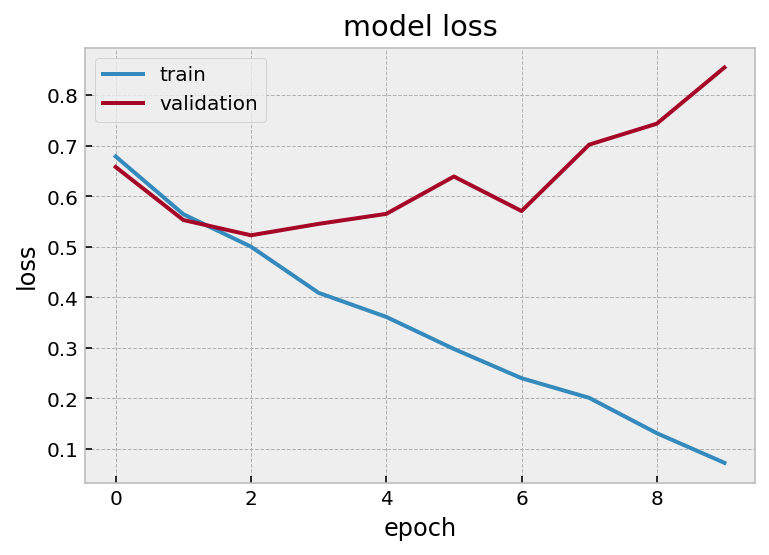

The training and validation accuracies for each epoch


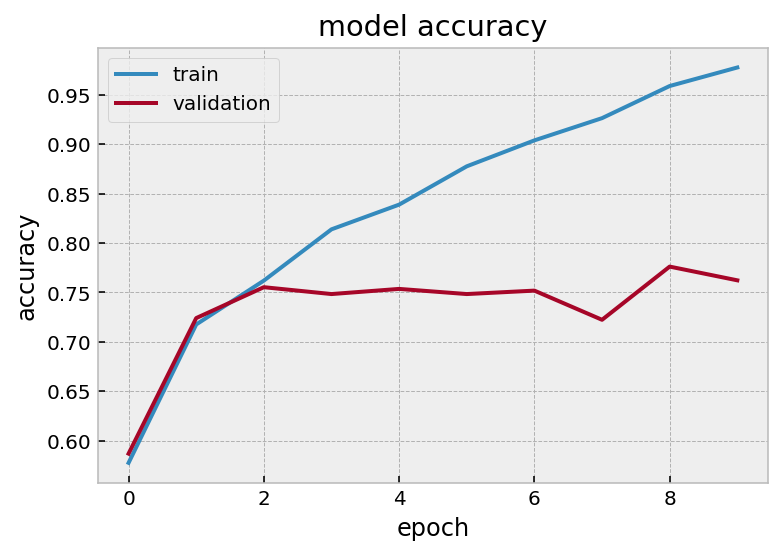

In [12]:
print(history.history.keys())

print("The training and validation loss for each epoch")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("The training and validation accuracies for each epoch")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Here from the two plots we noticed that there is a large amount of overfitting between the accuarcy of training and validation sets and the loss is also very high for validation set.Since the accuracy of the model increases continuously for the given test set, but the the accuaracy for the validation set seems increasing at the begining but then decreases again and looks unstable or continuous.Therefore, we need to implement some other models to balance them and try to plot more convincible plot for both the aaccuracy and loss function. In part 2 we will try to improve our model using different data agumentation models.

## Part 2: Data augmentation

We use different types of data augmentation, such as rotation, mirroring, and changing the colors to find the best agumentation for the picture.

In [63]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.05,
        fill_mode='constant',
        featurewise_center=True,
        horizontal_flip=True)


In [64]:
imgdir = 'pa3_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = train_datagen.flow_from_directory(
        imgdir + '/train',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=True)

Found 1600 images belonging to 2 classes.


In [65]:
Xbatch, Ybatch = train_generator.next()

In [66]:
Xbatch.shape

(32, 64, 64, 3)

In [67]:
Ybatch[4]

1.0

In [68]:
from matplotlib import pyplot as plt
plt.style.use('bmh')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

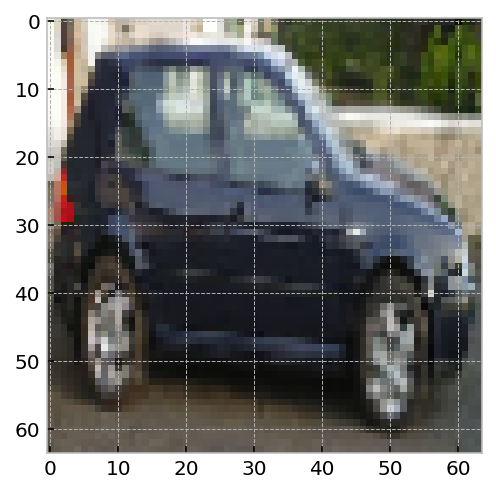

In [69]:
plt.imshow(Xbatch[4]);

In [70]:
Xbatch = Xbatch.reshape(Xbatch.shape[0], img_size, img_size, 3)
def make_convnet(img_width, img_height, c):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                     activation='relu',
                     input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model
cnn = make_convnet(img_size, img_size, 3)

In [71]:
validation_generator = data_gen.flow_from_directory(
        imgdir + '/validation',
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        shuffle=True)



Found 576 images belonging to 2 classes.


In [72]:
trainingBatchSize = math.ceil( 1600 / batch_size)
validationBatchSize = math.ceil( 576 / batch_size)
history = cnn.fit_generator(train_generator, 
                  validation_data=validation_generator, 
                  steps_per_epoch=trainingBatchSize,
                  validation_steps=validationBatchSize,
                  epochs=10,
                  use_multiprocessing=False)

  ...
    to  
  ['...']


C:\Users\Amerm\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
Train for 50 steps, validate for 18 steps
Epoch 1/10


C:\Users\Amerm\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


50/50 [==============================] - 10s 209ms/step - loss: 0.6968 - accuracy: 0.5825 - val_loss: 0.6123 - val_accuracy: 0.6806
Epoch 2/10
50/50 [==============================] - 12s 232ms/step - loss: 0.5811 - accuracy: 0.7000 - val_loss: 0.5630 - val_accuracy: 0.7413
Epoch 3/10
50/50 [==============================] - 10s 193ms/step - loss: 0.5081 - accuracy: 0.7563 - val_loss: 0.5449 - val_accuracy: 0.7431
Epoch 4/10
50/50 [==============================] - 9s 185ms/step - loss: 0.4593 - accuracy: 0.7919 - val_loss: 0.4666 - val_accuracy: 0.7865
Epoch 5/10
50/50 [==============================] - 9s 186ms/step - loss: 0.4259 - accuracy: 0.8119 - val_loss: 0.5975 - val_accuracy: 0.7118
Epoch 6/10
50/50 [==============================] - 9s 185ms/step - loss: 0.3888 - accuracy: 0.8062 - val_loss: 0.5357 - val_accuracy: 0.7708
Epoch 7/10
50/50 [==============================] - 9s 184ms/step - loss: 0.3631 - accuracy: 0.8388 - val_loss: 0.4941 - val_accuracy: 0.7899
Epoch 8/10
50/

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
The training and validation loss for each epoch


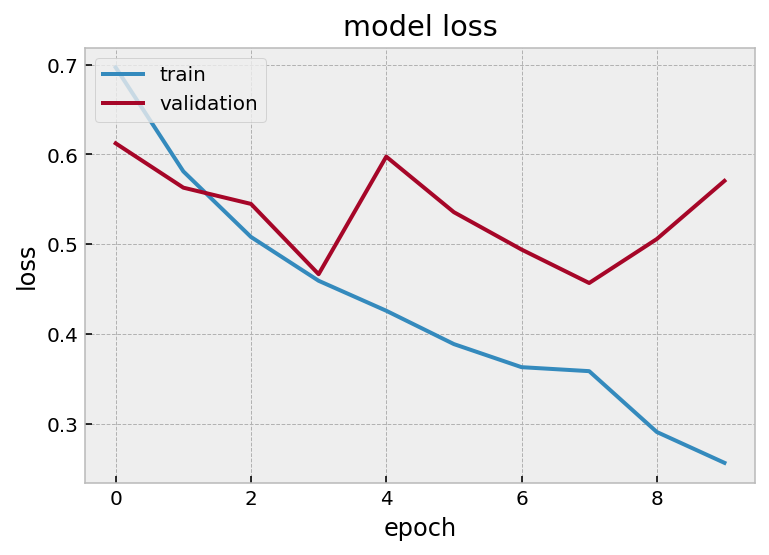

The training and validation accuracies for each epoch


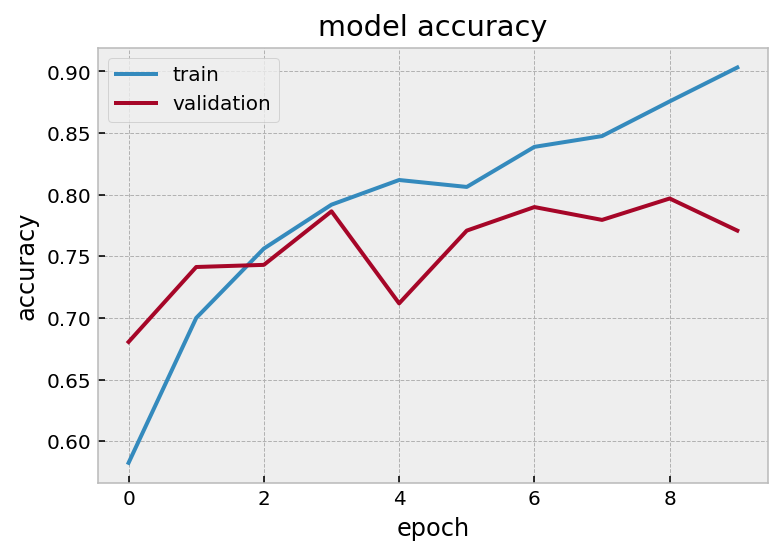

In [73]:
print(history.history.keys())

print("The training and validation loss for each epoch")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
print("The training and validation accuracies for each epoch")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


Now, it looks good compared with the first model, the accuracy increases continuously in both the training and validation sets. The loss for the validation set looks less constant, even if it has some higher loss. The loss for trianing set decreases as usual. 

### Interlude: Applying a pre-trained convolutional neural network

[[('n04037443', 'racer', 0.798619),
  ('n02974003', 'car_wheel', 0.0734624),
  ('n04461696', 'tow_truck', 0.02827696),
  ('n04465501', 'tractor', 0.025836073),
  ('n03967562', 'plow', 0.00811422)]]

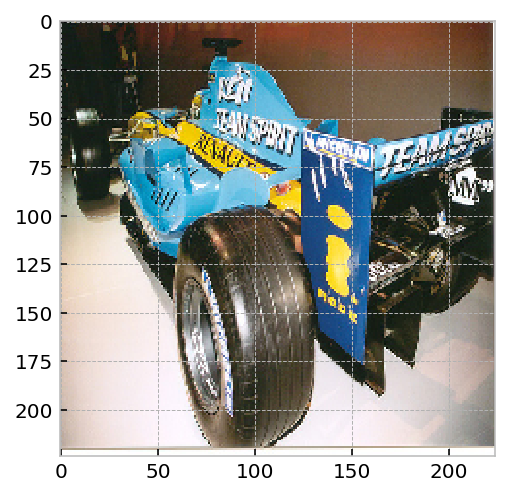

In [29]:
from tensorflow.keras import applications
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt
import numpy as np



img_size=224
img_size=224
vggmodel = applications.VGG16(weights='imagenet', include_top=True)


# load an image from file
image = load_img('pa3_images/train/car/0006.jpg', target_size=(224, 224))
plt.imshow(image);
image = img_to_array(image)
image = preprocess_input(image)
image = image.reshape(1, 224, 224, 3)

yhat = vggmodel.predict(image)
label = decode_predictions(yhat)
label

In this example we used the built-in function in Keras to build the VGG-16 model and testing it on a picture from the local traing set folder. We observe that the predication of the picture label was correct with high accuracy.

## Part 3: Using VGG-16 as a feature extractor

In this part we use the VGG-16 model as a feature extractor. By applying the convolutional part of the VGG-16 model to our images, and use this output as the input of our own classifier.

In [30]:
IMG_SIZE = 224

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
# we load the VGG16 as feature ectraction model
feature_extractor = applications.VGG16(input_shape=IMG_SHAPE,include_top=False, weights='imagenet')
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
imgdir = 'pa3_images' 
img_size = 64
batch_size = 32
def create_vgg16_features(subdir):
    generator = vgg_data_gen.flow_from_directory(
        imgdir + '/' + subdir,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=batch_size,
        shuffle=False)
    if subdir == 'train' : step_size = 1600/batch_size
    else : step_size = 576/batch_size
    cnn_features = feature_extractor.predict_generator(generator, steps=step_size, verbose=1)
    with open('vgg16_' + subdir, 'wb') as f:
        np.save(f, cnn_features)

create_vgg16_features('train')
create_vgg16_features('validation')



Found 1600 images belonging to 2 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
50/50 [==============================] - 567s 11s/step
Found 576 images belonging to 2 classes.
18/18 [==============================] - 177s 10s/step


In [31]:
def make_vggnet():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model  

def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))    

def train_on_cnnfeatures():
    with open('vgg16_train', 'rb') as f:
        train_data = np.load(f)
    with open('vgg16_validation', 'rb') as f:
        val_data = np.load(f)
    vggmodel = make_vggnet()    
    history  = vggmodel.fit(x=train_data, 
                            y=get_labels(1600), 
                            epochs=10, 
                            validation_data=[val_data, get_labels(576)],
                            steps_per_epoch=trainingBatchSize, 
                            validation_steps=validationBatchSize)
    return history, vggmodel

In [32]:
history, model = train_on_cnnfeatures()

Train on 1600 samples, validate on 576 samples
Epoch 1/10
1600/1600 [==============================] - 2s 1ms/sample - loss: 3.4079 - accuracy: 0.8675 - val_loss: 0.7565 - val_accuracy: 0.9306
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/sample - loss: 0.2239 - accuracy: 0.9744 - val_loss: 0.7099 - val_accuracy: 0.9219
Epoch 3/10
1600/1600 [==============================] - 2s 1ms/sample - loss: 0.0607 - accuracy: 0.9869 - val_loss: 0.6231 - val_accuracy: 0.9306
Epoch 4/10
1600/1600 [==============================] - 2s 954us/sample - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.6324 - val_accuracy: 0.9288
Epoch 5/10
1600/1600 [==============================] - 1s 907us/sample - loss: 1.7605e-04 - accuracy: 1.0000 - val_loss: 0.6380 - val_accuracy: 0.9323
Epoch 6/10
1600/1600 [==============================] - 2s 2ms/sample - loss: 8.3616e-05 - accuracy: 1.0000 - val_loss: 0.6411 - val_accuracy: 0.9340
Epoch 7/10
1600/1600 [==============================] - 3s 2ms/sa

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


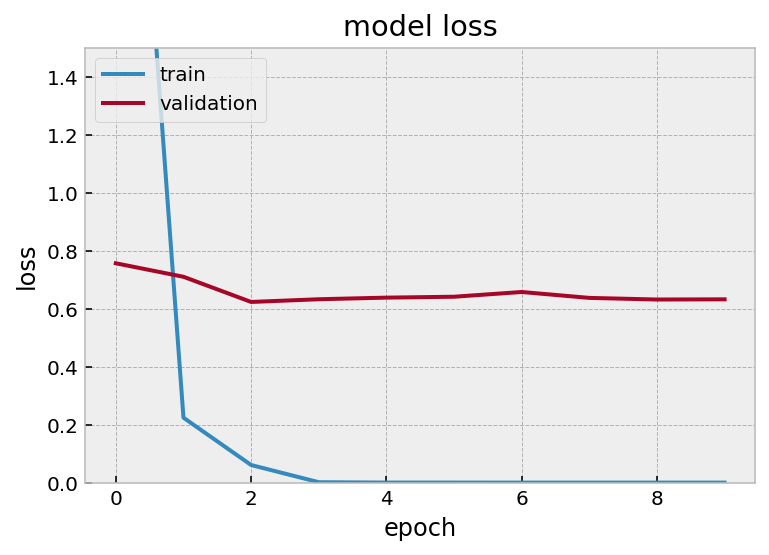

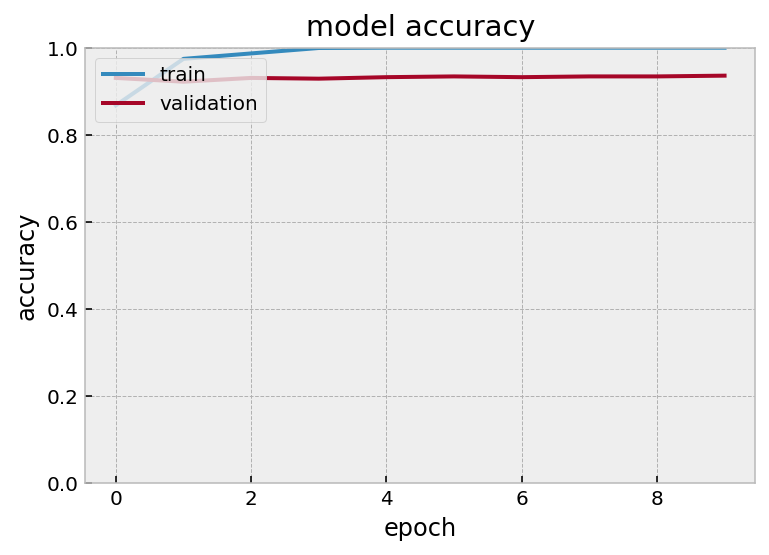

In [33]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,1.5)
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In this new convolutional network the accuracy is much higher than the previous task and we see overfitting but this is may be we have small training set that did not allow the neural network to learn enough to classify images.Using vgg16  we can generate features we could use several algorithms for the classifier. We can use a neural network for the classifier simply because we could reuse the code. 

However, we can use another algorithm such as SGD that would performe better for both the accuary and overfitting problems.


## Part 4: Visualizing the learned features

We can get the weights in this convolutional layer. This is a four-dimensional NumPy tensor: width x height x colors x number of convolutions.

In [34]:
first_layer_weights = vggmodel.get_weights()[0]
first_layer_weights.shape


(3, 3, 3, 64)

In [35]:
def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k


let's try with different convolutional filter by considering the position between (0-63) and boolean (True/False) whether we want to see positive or negative part of this filter.

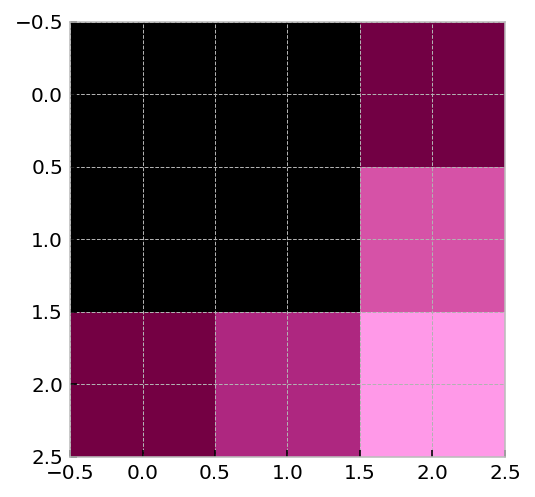

In [36]:
plt.imshow(kernel_image(first_layer_weights, 23, True))
plt.show()

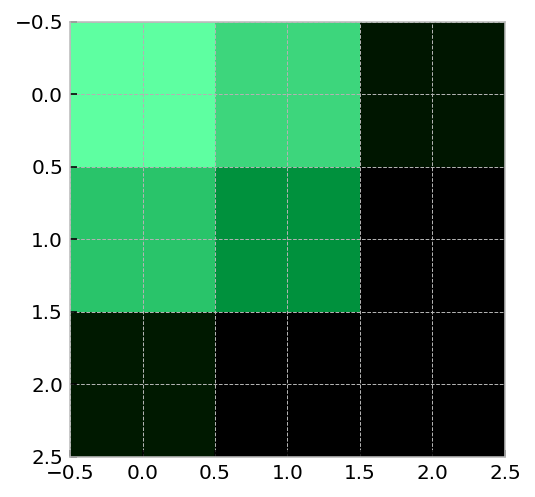

In [37]:
plt.imshow(kernel_image(vggmodel.get_weights()[0], 23, False))
plt.show()

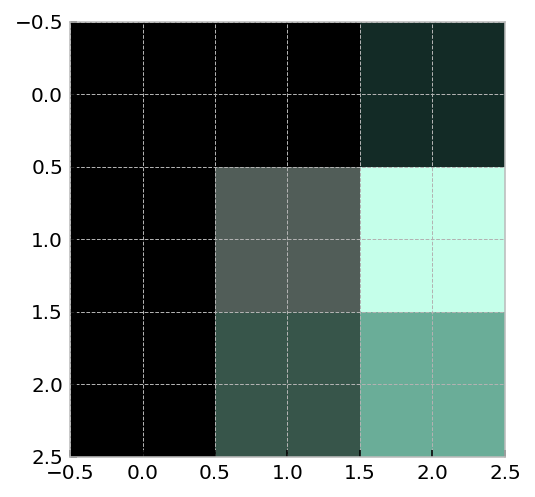

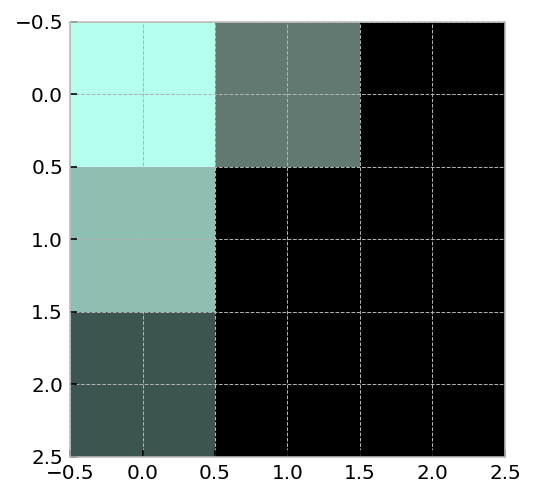

In [38]:
plt.imshow(kernel_image(vggmodel.get_weights()[0], 35, True))
plt.show()
plt.imshow(kernel_image(vggmodel.get_weights()[0], 35, False))
plt.show()

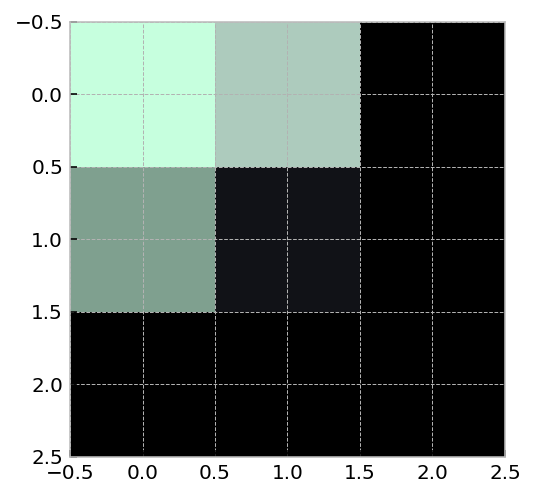

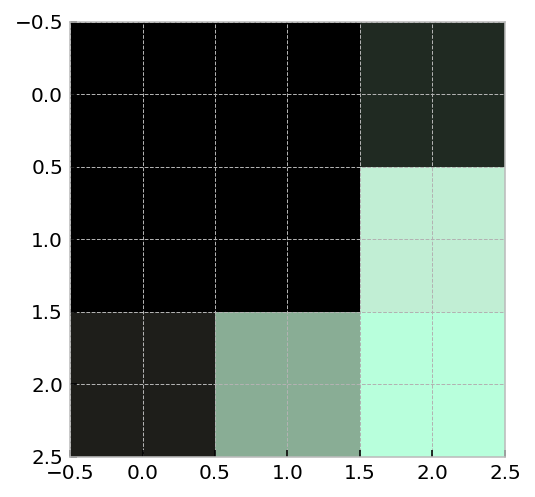

In [39]:
plt.imshow(kernel_image(vggmodel.get_weights()[0], 0, True))
plt.show()
plt.imshow(kernel_image(vggmodel.get_weights()[0], 0, False))
plt.show()

Finaly,we uses the convolutional filter (0-63), a boolean (True/False) for all possible combination looks like..

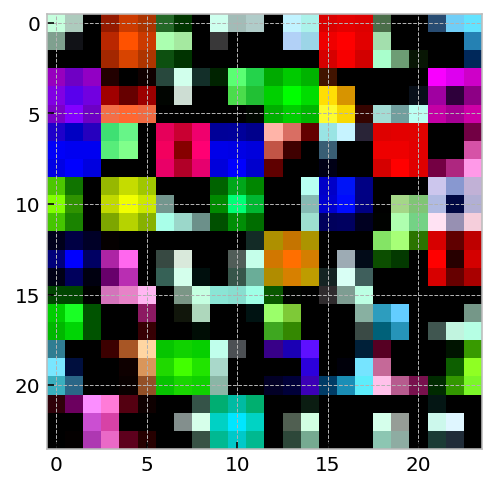

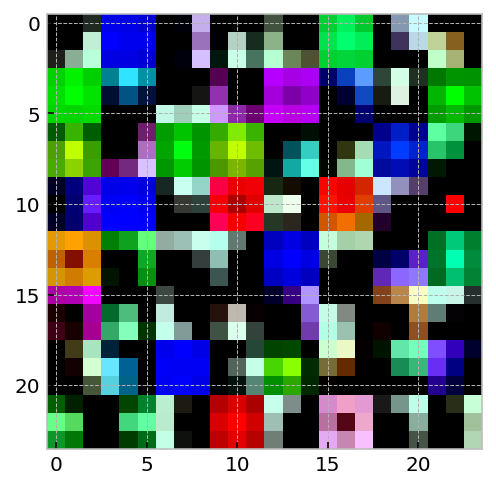

In [40]:
def ShowWholeFilter(b): 
    A = np.empty((3,3,3))
    for j in range(8):
        B = kernel_image(vggmodel.get_weights()[0], j*8, b)
        for i in range(7):
            B = np.hstack((B, kernel_image(vggmodel.get_weights()[0], j*8 + (i+1), b)))
        if j == 0:
            A = B
        else:
            A= np.vstack((A,B))
        if(j == 7):
            return A
plt.imshow(ShowWholeFilter(True))     
plt.show()
plt.imshow(ShowWholeFilter(False))     
plt.show()